# **MODEL FOR DROPseq HCC1806**

## Exploratory Data Analysis(EDA)

Given that the data has already undergone the process of filtering and normalization, we expect the EDA to provide valuable insights and information about our dataset.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
H_drop_fil = pd.read_csv('HCC1806_Filtered_Normalised_3000_Data_train.txt', sep = ' ')

H_drop_fil.head()

AAAAAACCCGGC_Normoxia  AAAACCGGATGC_Normoxia  AAAACGAGCTAG_Normoxia   
H1-5                         2                      2                      5  \
MALAT1                       3                      3                      2   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       0                      1                      1   

         AAAACTTCCCCG_Normoxia  AAAAGCCTACCC_Normoxia  AAACACAAATCT_Normoxia   
H1-5                         1                      0                      0  \
MALAT1                       3                     12                      3   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       0                      0                      1   

         AAACCAAGCCCA_Normoxia  AAACCATGCACT_Normoxia  AAACCTCCGGCT_Normoxia   
H1-5                         0                      0                      1  \
MALAT1                       1                      2                      0   
MT-RNR2                      0                      0                      0   
ARVCF                        0                      0                      0   
BCYRN1                       1                      2                      0   

         AAACGCCGGTCC_Normoxia  ...  TTTTCTGATGGT_Hypoxia   
H1-5                         0  ...                     0  \
MALAT1                       0  ...                     3   
MT-RNR2                      1  ...                     1   
ARVCF                        0  ...                     0   
BCYRN1                       3  ...                     1   

         TTTTGATTCAGA_Hypoxia  TTTTGCAACTGA_Hypoxia  TTTTGCCGGGCC_Hypoxia   
H1-5                        1                     0                     2  \
MALAT1                      1                     1                     1   
MT-RNR2                     2                     2                     2   
ARVCF                       0                     0                     0   
BCYRN1                      1                     0                     1   

         TTTTGTTAGCCT_Hypoxia  TTTTTACCAATC_Hypoxia  TTTTTCCGTGCA_Hypoxia   
H1-5                        1                     0                     0  \
MALAT1                      4                     0                     4   
MT-RNR2                     0                     0                     1   
ARVCF                       0                     0                     0   
BCYRN1                      1                     0                     0   

         TTTTTGCCTGGG_Hypoxia  TTTTTGTAACAG_Hypoxia  TTTTTTTGAATC_Hypoxia  
H1-5                        0                     3                     1  
MALAT1                      1                     3                     6  
MT-RNR2                     0                     1                     0  
ARVCF                       0                     0                     0  
BCYRN1                      1                     0                     0  

[5 rows x 14682 columns]

We start by inspecting the structure of the dataset and its dimension; subsequently, we will check whether the dataset contains non-integer elements, null values or NaNs.

In [ ]:
print('Dimension of the dataset: ', H_drop_fil.shape)
n_rows= H_drop_fil.shape[0]
n_col= H_drop_fil.shape[1]
print('Number of rows:', n_rows, '\nNumber of columns:', n_col)

Dimension of the dataset:  (3000, 14682)
Number of rows: 3000 
Number of columns: 14682


In [ ]:
if len(H_drop_fil.dtypes[H_drop_fil.dtypes == 'int64']) == n_col:
    print('All entries are integer numbers')

def empty_cols(df):
    nulldf=[]
    for col in df.columns:
        if df[col].sum()==0:
            nulldf.append(col)
    return nulldf
print('Empty columns:', empty_cols(H_drop_fil))

All entries are integer numbers
Empty columns: []


In [ ]:
print(H_drop_fil.isna().sum().sum())
print(H_drop_fil.isnull().sum().sum())

0
0


In [ ]:
duplicate_cols = []
for i in H_drop_fil.duplicated():
    if i == True:
        duplicate_cols.append(i)
print('Duplicate columns: ' +str(duplicate_cols))
duplicate_rows = []
for i in H_drop_fil.T.duplicated():
    if i == True:
        duplicate_rows.append(i)
print(f"Duplicate rows: {duplicate_rows}")

Duplicate columns: []
Duplicate rows: []


Our dataset exhibits several notable characteristics. Firstly, it is worth mentioning that the dataset does not contain any duplicate columns, ensuring that each gene is uniquely represented and therefore that any redundancy in the gene information is avoided.

Furthermore, the dataset does not contain any NaN or null values, ad all the entries are integer values.

The combination of these characteristics provides an encouraging assumption for our subsequent analysis.

### More details about the distributions:

In [ ]:
H_drop_fil.describe()

AAAAAACCCGGC_Normoxia  AAAACCGGATGC_Normoxia  AAAACGAGCTAG_Normoxia   
count             3000.00000            3000.000000            3000.000000  \
mean                 0.02900               0.041667               0.024333   
std                  0.23276               0.309778               0.231860   
min                  0.00000               0.000000               0.000000   
25%                  0.00000               0.000000               0.000000   
50%                  0.00000               0.000000               0.000000   
75%                  0.00000               0.000000               0.000000   
max                  5.00000               9.000000               7.000000   

       AAAACTTCCCCG_Normoxia  AAAAGCCTACCC_Normoxia  AAACACAAATCT_Normoxia   
count            3000.000000            3000.000000            3000.000000  \
mean                0.021667               0.029667               0.020000   
std                 0.189409               0.323761               0.170126   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                 0.000000               0.000000               0.000000   
75%                 0.000000               0.000000               0.000000   
max                 4.000000              12.000000               3.000000   

       AAACCAAGCCCA_Normoxia  AAACCATGCACT_Normoxia  AAACCTCCGGCT_Normoxia   
count            3000.000000             3000.00000            3000.000000  \
mean                0.036000                0.02600               0.034000   
std                 0.250449                0.23525               0.231362   
min                 0.000000                0.00000               0.000000   
25%                 0.000000                0.00000               0.000000   
50%                 0.000000                0.00000               0.000000   
75%                 0.000000                0.00000               0.000000   
max                 4.000000                6.00000               4.000000   

       AAACGCCGGTCC_Normoxia  ...  TTTTCTGATGGT_Hypoxia  TTTTGATTCAGA_Hypoxia   
count            3000.000000  ...           3000.000000           3000.000000  \
mean                0.029333  ...              0.043000              0.049667   
std                 0.218683  ...              0.271739              0.319219   
min                 0.000000  ...              0.000000              0.000000   
25%                 0.000000  ...              0.000000              0.000000   
50%                 0.000000  ...              0.000000              0.000000   
75%                 0.000000  ...              0.000000              0.000000   
max                 4.000000  ...              4.000000              7.000000   

       TTTTGCAACTGA_Hypoxia  TTTTGCCGGGCC_Hypoxia  TTTTGTTAGCCT_Hypoxia   
count           3000.000000           3000.000000           3000.000000  \
mean               0.037000              0.047667              0.057000   
std                0.279864              0.259648              0.304053   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                7.000000              4.000000              5.000000   

       TTTTTACCAATC_Hypoxia  TTTTTCCGTGCA_Hypoxia  TTTTTGCCTGGG_Hypoxia   
count           3000.000000           3000.000000           3000.000000  \
mean               0.023333              0.041667              0.041667   
std                0.214797              0.236536              0.285116   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0

In [ ]:
min_mean= min(H_drop_fil.describe().loc['mean'].tolist())
max_mean= max(H_drop_fil.describe().loc['mean'].tolist())
print(f"The mean ranges from {min_mean} to {max_mean}")
std= np.mean(np.array(H_drop_fil.describe().loc['std'].tolist()))
print(f"The average standard deviation is {std}")

extr_low= min(H_drop_fil.describe().loc['min'].tolist())
extr_high= max(H_drop_fil.describe().loc['max'].tolist())
print(f"The extreme values of the dataset are {extr_low} and {extr_high}")

The mean ranges from 0.013 to 0.07333333333333333
The average standard deviation is 0.2790719033977203
The extreme values of the dataset are 0.0 and 110.0


We can read a certain state of balance or symmetry. This observation is based on the examination of both the mean and the standard deviation values, which are centered around 0 for all cells, especially implying that the variation within the dataset is relatively low. 

We can visualize this information more precisely with a violin plot:

In [ ]:
plt.figure(figsize=(40,10))
sns.violinplot(data= H_drop_fil, palette="Set3",cut=0)
plt.setp(plt.gca().get_xticklabels(), rotation= 90)
plt.show()

In [ ]:
random_cell = np.random.randint(14682)
sns.violinplot(H_drop_fil.iloc[:,random_cell])
plt.title(f'Violin Plot of {H_drop_fil.columns[random_cell]}');

The violin plot serves as a visual depiction of the distribution of the dataset's. From the plot, it is evident that the range of the data does not exhibit significant fluctuations and appears to be quite stable, with the exception of a few outliers.

In the violin plot of a randomly selected cell, we observe the presence of a distinct peak at zero, which is consistent with the characteristics of sparsity we have already analysed in the previous EDAs of our report. This finding prompts us to delve deeper into the sparsity phenomenon, which is characterized by a higher frequency of zeros in the dataset.

### Correlation

The subsequent phase of our EDA focuses on investigating the correlation patterns within the dataset, specifically examining the relationships between cells and between genes.

The next step in our EDA concerns the analysis of the correlation between cells and between genes.

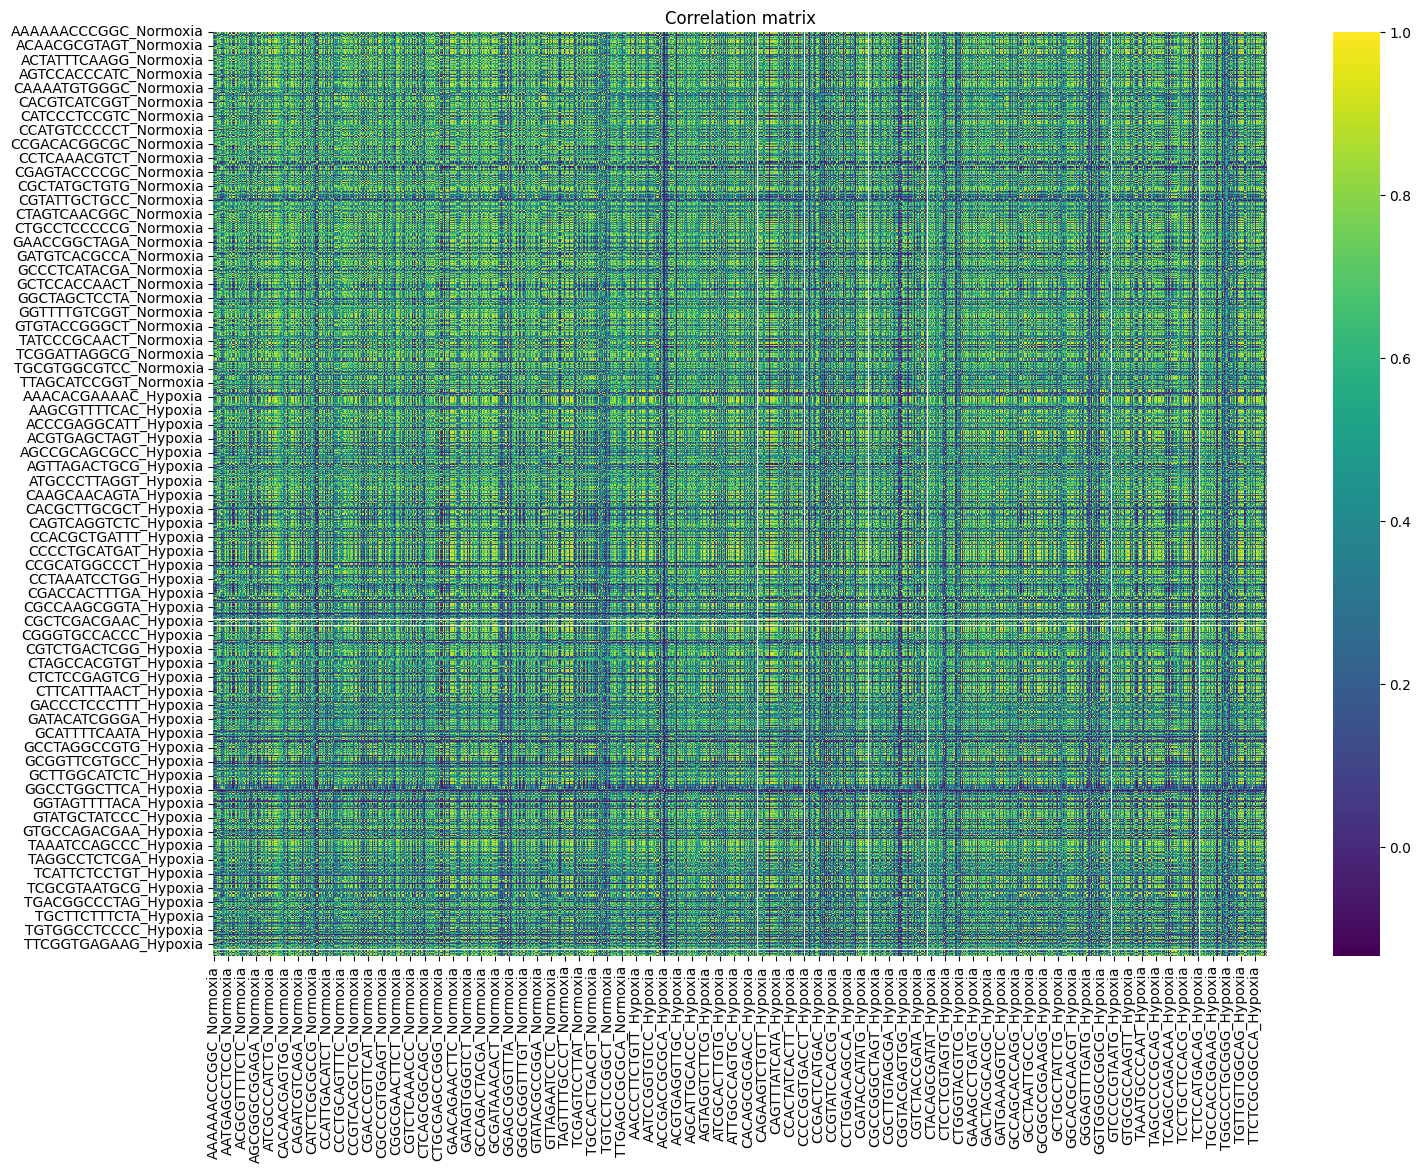

In [ ]:
plt.figure(figsize=(17, 12))
corr = H_drop_fil[0:50].corr()
sns.heatmap(corr, cmap = 'viridis');
plt.title('Correlation matrix');

### Target Variables

In [ ]:
df = pd.DataFrame(H_drop_fil.T)
df['label'] = np.zeros(H_drop_fil.shape[1])
for i in H_drop_fil:
    if 'Normoxia' in i:
        df['label'][i] = 0
    if 'Hypoxia' in i:
        df['label'][i] = 1

df['label'] = df['label'].astype(int)
df = df.T

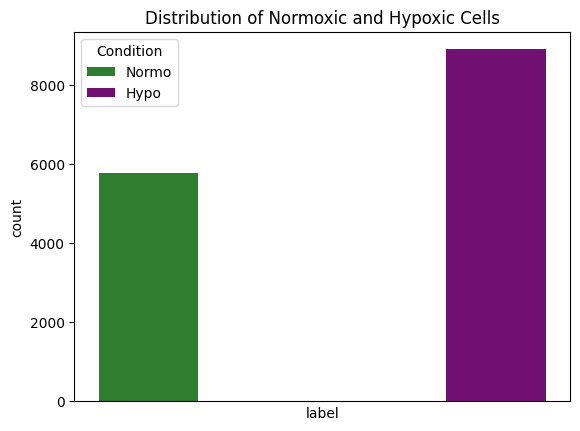

In [ ]:
plt.figure()
sns.countplot(data= df.T, x ='label',  palette = ['forestgreen', 'purple'], hue = 'label');
plt.title("Distribution of Normoxic and Hypoxic Cells");
plt.legend(title='Condition', loc='best', labels=['Normo', 'Hypo']);
plt.xticks([]);

In [ ]:
np.bincount(df.T['label'])

array([5783, 8899], dtype=int64)

The two classes are slightly unbalanced, the proportion is about 40% Normo and 60% Hypo, since the imbalance is not that significant we decide not to proceed with oversampling or undersampling techniques.

In [ ]:
normo = df.T[df.T['label'] == 0].T
normo.drop('label', axis = 'index', inplace = True)
hypo = df.T[df.T['label'] == 1].T
hypo.drop('label', axis = 'index', inplace = True)

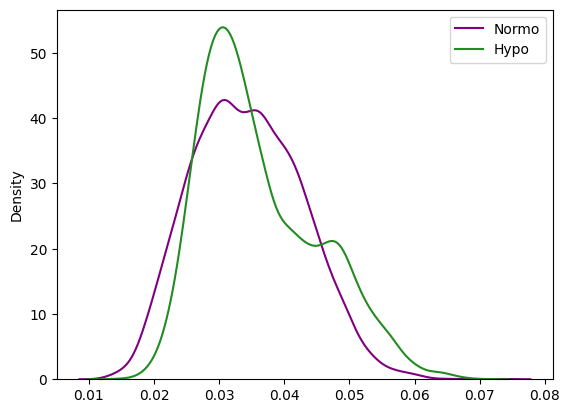

In [ ]:
sns.kdeplot(data=normo.mean(), label = 'Normo', clip = [0,1000], color = 'purple')
sns.kdeplot(data=hypo.mean(), label = 'Hypo', clip = [0,1000], color = 'forestgreen')
plt.legend()
plt.show()

### Visualization of the data

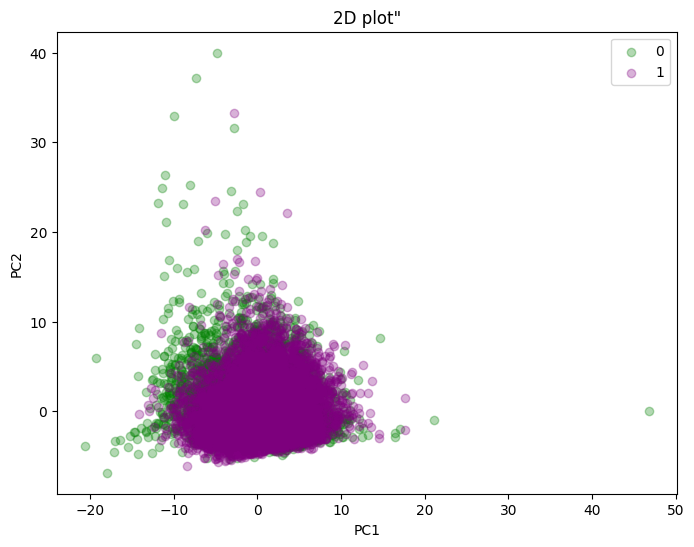

In [ ]:
# Perform PCA on the unfiltered dataset
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.T)

# Get condition labels for the samples
conditions = df.T["label"]

# Create a PCA plot
plt.figure(figsize=(8, 6))
for condition, color in zip(conditions.unique(), ['green', 'purple']):
    idx = conditions == condition
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=color, label=condition, alpha = 0.3)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D plot"')
plt.show()

In [ ]:
# PCA model with three components
import plotly.express as px

condition = df.T['label'].astype(str)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.T)
g = pd.DataFrame(pca_result)
g.set_index(condition, inplace =True)


fig = px.scatter_3d(g, x=0, y=1, z=2,
                     color = g.index, color_discrete_sequence = ['purple', 'green']
                    
                    )
#
fig.show()


Indeed there is no evident cluster neither data are linearly separable

## Supervised Learning Models

Given the high dimension of the dataset, we need to be aware of the so called 'curse of dimensionality'. To address this issue, we perform  Feature Selection using the Random Forest classifier. By doing so, we can alleviate the computational burden and improve the interpretability of the data, facilitating more effective machine learning analysis.

### Feature Selection

We use the same strategy as we did on the SmartS datasets

In [ ]:
X = df.T.drop('label', axis = 1)
y = df.T['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)

In [ ]:
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

In [ ]:
important_features = pd.DataFrame(clf.feature_importances_, index = df.T.drop('label', axis = 1).columns).rename(columns = {0: 'Important features'})
important_features = important_features[important_features['Important features'] > 0]
top_15 = important_features.sort_values(by = 'Important features', ascending = False).iloc[:15,:]
important_features

Important features
H1-5               0.002466
MALAT1             0.009115
MT-RNR2            0.003885
ARVCF              0.000025
BCYRN1             0.015336
...                     ...
SCCPDH             0.000099
NTAN1              0.000096
CLIP2              0.000051
DUSP23             0.000155
ZNF682             0.000018

[2926 rows x 1 columns]

In [ ]:
X = X[important_features.index]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=43)

We will use the 'scores' dataframe to store the accuracy score, F1 score, precision score, and recall score for each of the models we want to compare. Additionally, the 'cross_ent' and 'MSE' lists will hold the binary cross entropy and mean squared error values respectively. These metrics provide us with additional insights to help determine the best model, adding further criteria for evaluation.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
scores = pd.DataFrame()
scores['accuracy_score'] = []
scores['f1_score'] = []
scores['precision_score'] = []
scores['recall_score'] = []
cross_ent = []
MSE = []

In [ ]:
def cross_entropy(y_pred, y_test, epsilon=1e-10):
    predictions = np.clip(y_pred, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce_loss = -np.sum(np.sum(y_test * np.log(predictions + 1e-5)))/N
    return ce_loss

### Random Forest

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It operates by constructing a multitude of decision trees on randomly sampled subsets of the training data and then aggregates the predictions of each tree to generate the final prediction.

We try fitting Random Forest on our test and train set, without adjusting any parameters, eventually we will perform hyper parameters tuning later in the analysis

In [ ]:
clf = RandomForestClassifier(random_state=43)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy Score: ' +str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.9332606919095614


In [ ]:
scs = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), 
       recall_score(y_test, y_pred, average='weighted')]
cross_ent.append(cross_entropy(y_test, y_pred))
scores.loc['Random Forest'] = scs
MSE.append(mean_squared_error(y_test, y_pred))

#### K-Nearest Neighbors

The K-Nearest Neighbors classifier works by identifying the k nearest neighbors of a given data point in the training dataset and assigning the data point to the class that is most prevalent among its neighbors. In other words, KNN determines the class of an unknown data point based on the classes of its nearest neighbors.

In [ ]:
scs = []
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy Score: ' +str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5704167801688913


In [ ]:
scs = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), 
       recall_score(y_test, y_pred, average='weighted')]
cross_ent.append(cross_entropy(y_test, y_pred))
scores.loc['KNN'] = scs
MSE.append(mean_squared_error(y_test, y_pred))

### Support Vector Machine 

Support Vector Machine aims to find an optimal hyperplane that separates the two classes by maximizing the margin between them, while also allowing for a certain degree of misclassification.

In [ ]:
scs = []
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy Score: ' +str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.954508308362844


In [ ]:
scs = [accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), precision_score(y_test, y_pred, average='weighted'), 
       recall_score(y_test, y_pred, average='weighted')]
cross_ent.append(cross_entropy(y_test, y_pred))
scores.loc['SVM'] = scs
MSE.append(mean_squared_error(y_test, y_pred))

### Logistic Regression

Logistic Regression models the relationship between the input variables and the probability of belonging to a specific class, using a logistic function to map the input features to the probability of the target class.

In [ ]:
scs = []
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state= 2)
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
print('Accuracy score: ' +str(accuracy_score(y_test, y_pred2)))

Accuracy score: 0.9526014709888314


In [ ]:
scs = [accuracy_score(y_test, y_pred2), f1_score(y_test, y_pred2, average='weighted'), precision_score(y_test, y_pred2, average='weighted'), 
       recall_score(y_test, y_pred2, average='weighted')]
cross_ent.append(cross_entropy(y_test, y_pred2))
scores.loc['Logistic Regression'] = scs
MSE.append(mean_squared_error(y_test, y_pred2))

## Models Comparison and evaluation

### Accuracy Scores

We manipulate the scores dataset in order to plot our results in a barplot

In [ ]:
scores1 = scores.copy()
scores1 = scores1.rename(index={0: 'Random Forest', 1: 'KNN', 2: 'SVM', 3: 'Logistic Regression'})
scores1 = scores1.reset_index().melt(id_vars='index', var_name='Score_type', value_name='Score_value')
scores1.columns = ['Model', 'Score_type', 'Score_value']

scores1 = scores1[['Model', 'Score_value', 'Score_type']]
scores1 = pd.DataFrame(scores1)

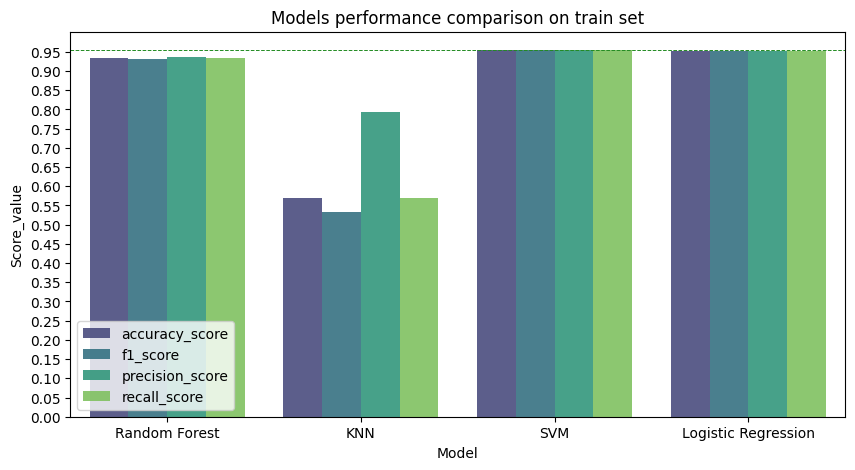

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.barplot(data = scores1, x = 'Model', y = 'Score_value', hue = 'Score_type', alpha = 0.9, palette = 'viridis');
plt.title('Models performance comparison on train set');
plt.legend(loc = 'lower left');
plt.axhline(max(scores1['Score_value']), linestyle = '--', color = 'forestgreen', linewidth = 0.7);
plt.yticks(np.arange(0,1, step = 0.05));

### Cross Entropy Loss and Mean Squared Error Loss

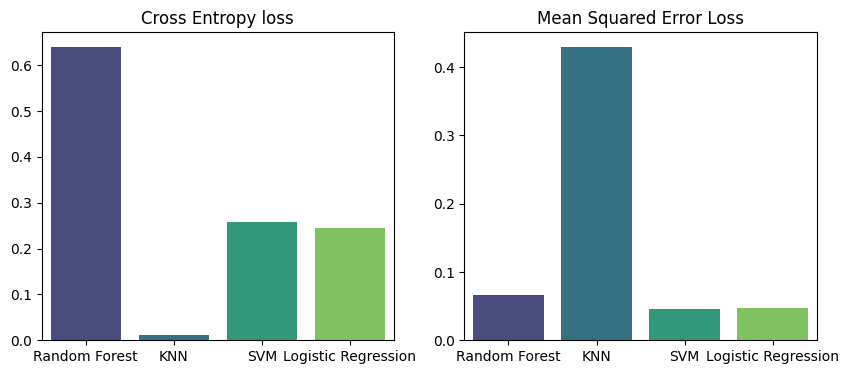

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.barplot(x=['Random Forest', 'KNN', 'SVM', 'Logistic Regression'], y=cross_ent, palette= 'viridis', ax = axes[0])
axes[0].set_title('Cross Entropy loss')
second = sns.barplot(x=['Random Forest', 'KNN', 'SVM', 'Logistic Regression'], y=MSE, palette= 'viridis', ax=axes[1])
axes[1].set_title('Mean Squared Error Loss');

### Neural Network

Neural network consists of interconnected layers of artificial neurons that learn from data to make predictions or classify inputs, allowing it to capture complex relationships and patterns in the data.

The NN consists of three hidden layers, each comprising 64 units and employing the rectified linear unit (ReLU) activation function. The output layer, with a single unit, uses the sigmoid activation function for binary classification. The model is compiled with the Nadam optimizer and trained using binary cross-entropy loss. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/10
11011/11011 [==============================] - 103s 9ms/step - loss: 0.1721 - binary_accuracy: 0.9355 - val_loss: 0.1268 - val_binary_accuracy: 0.9504
Epoch 2/10
11011/11011 [==============================] - 98s 9ms/step - loss: 0.0874 - binary_accuracy: 0.9697 - val_loss: 0.1163 - val_binary_accuracy: 0.9600
Epoch 3/10
11011/11011 [==============================] - 122s 11ms/step - loss: 0.0468 - binary_accuracy: 0.9845 - val_loss: 0.1636 - val_binary_accuracy: 0.9567
Epoch 4/10
11011/11011 [==============================] - 125s 11ms/step - loss: 0.0249 - binary_accuracy: 0.9918 - val_loss: 0.2268 - val_binary_accuracy: 0.9589
Epoch 5/10
11011/11011 [==============================] - 119s 11ms/step - loss: 0.0173 - binary_accuracy: 0.9965 - val_loss: 0.4105 - val_binary_accuracy: 0.9548
Epoch 6/10
11011/11011 [==============================] - 123s 11ms/step - loss: 0.0135 - binary_accuracy: 0.9968 - val_loss: 0.4535 - val_binary_accuracy: 0.9594
Epoch 7/10
11011/11011 [=

In [ ]:
y_pred1 = model.predict(X_test)
print('Accuracy Score: ' + str(accuracy))
print('Binary Cross Entropy  loss: ' +str(loss))
print('Mean Squared Error Loss: ' + str(mean_squared_error(y_test, y_pred1)))

115/115 [==============================] - 0s 3ms/step
Accuracy Score: 0.9566875696182251
Binary Cross Entropy  loss: 0.541532039642334
Mean Squared Error Loss: 0.03805433755640302


Thiese results are satisfactory, but there is a margin for improvement. We decide to run gridsearch for finding the best optimizer. In order to do so we need to define the function create_model, which we will use as the model parameter of gridsearch.

In [ ]:
def create_model(optimizer):
    # define model
    model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])
    model.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['binary_accuracy'])
    return model
     

In [ ]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=10, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(model__optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)
print(grid_result.best_params_)

{'model__optimizer': 'Adagrad'}


The best optimizer found by GS is 'Adagrad'. The Adagrad optimizer adjusts the learning rate for each parameter based on the historical gradients, giving more emphasis to parameters with smaller gradients and smaller updates to parameters that frequently receive large gradients.
This adaptive learning rate scheme allows the algorithm to converge more quickly on parameters that have not yet been well-optimized while taking smaller steps for frequently updated parameters.

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=1, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/30
11011/11011 [==============================] - 10s 845us/step - loss: 0.2820 - binary_accuracy: 0.8859 - val_loss: 0.1563 - val_binary_accuracy: 0.9412
Epoch 2/30
11011/11011 [==============================] - 9s 815us/step - loss: 0.1258 - binary_accuracy: 0.9531 - val_loss: 0.1305 - val_binary_accuracy: 0.9480
Epoch 3/30
11011/11011 [==============================] - 9s 859us/step - loss: 0.0992 - binary_accuracy: 0.9647 - val_loss: 0.1179 - val_binary_accuracy: 0.9515
Epoch 4/30
11011/11011 [==============================] - 11s 1ms/step - loss: 0.0841 - binary_accuracy: 0.9704 - val_loss: 0.1113 - val_binary_accuracy: 0.9559
Epoch 5/30
11011/11011 [==============================] - 9s 815us/step - loss: 0.0734 - binary_accuracy: 0.9745 - val_loss: 0.1079 - val_binary_accuracy: 0.9583
Epoch 6/30
11011/11011 [==============================] - 9s 842us/step - loss: 0.0654 - binary_accuracy: 0.9780 - val_loss: 0.1056 - val_binary_accuracy: 0.9597
Epoch 7/30
11011/11011 [====

Thanks to fine-tuning, the model was able to slightly increase its accuracy up to 
96
%
.